# Data Exploration

In [10]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

## Import Dataset

In [11]:
ratings = pd.read_csv("../database/merged/full/ratings.csv")
metadatas = pd.read_csv("../database/merged/metadatas.csv")
movie_ratings = pd.read_csv("../database/merged/global_ratings.csv")
movies = pd.merge(metadatas, movie_ratings, on="MovieID")

Movies: Metatdatas and Global Rating

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MovieID          87585 non-null  int64  
 1   Title            87585 non-null  object 
 2   Runtime          87530 non-null  object 
 3   ReleaseDate      87577 non-null  object 
 4   Genres           87585 non-null  object 
 5   Directors        87585 non-null  object 
 6   Cast             87585 non-null  object 
 7   OriginCountries  87585 non-null  object 
 8   Languages        87585 non-null  object 
 9   Plot             87389 non-null  object 
 10  AverageRating    87585 non-null  float64
 11  VoteCount        87585 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 8.0+ MB


Ratings dataset: User - Movie - Rating

In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   UserID   int64  
 1   MovieID  int64  
 2   Rating   float64
dtypes: float64(1), int64(2)
memory usage: 732.4 MB


Reformat columns

In [14]:
movies["ReleaseDate"] = pd.to_datetime(movies["ReleaseDate"])
movies["Runtime"] = pd.to_timedelta(movies["Runtime"])
movies["Runtime"] = movies["Runtime"] / pd.Timedelta(hours=1)
movies["Genres"] = movies["Genres"].apply(lambda x: literal_eval(x))
movies["Directors"] = movies["Directors"].apply(lambda x: literal_eval(x))
movies["Cast"] = movies["Cast"].apply(lambda x: literal_eval(x))
movies["OriginCountries"] = movies["OriginCountries"].apply(lambda x: literal_eval(x))

## Data Analysis

### A. On Movies Dataset

#### Release date

count                            87577
mean     1995-12-20 07:31:42.787261568
min                1874-12-09 00:00:00
25%                1981-08-28 00:00:00
50%                2006-03-09 00:00:00
75%                2015-09-30 00:00:00
max                2024-11-20 00:00:00
Name: ReleaseDate, dtype: object


<Axes: >

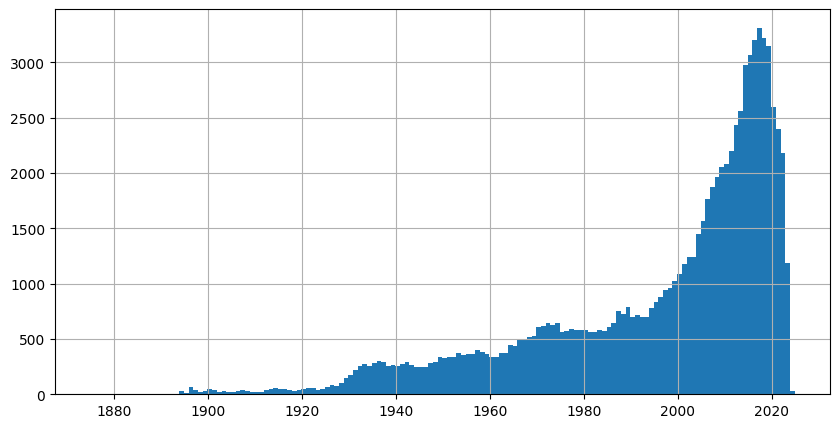

In [6]:
print(movies["ReleaseDate"].describe())
movies["ReleaseDate"].hist(bins=(2024 - 1874), figsize=(10, 5))

Top-10 most recent movies

In [7]:
movies.nlargest(10, ["ReleaseDate"])[["MovieID", "Title", "ReleaseDate"]]

,MovieID,Title,ReleaseDate
59113,198149,Wicked,2024-11-20
85760,286495,Starring Jerry As Himself (2023),2024-11-06
85088,283733,Haulout (2022),2024-10-03
70135,225715,Addiction,2024-09-20
86142,287645,Hidden Letters (2022),2024-08-31
84553,282433,Rock & Roll Revival,2024-06-28
83518,279808,The Grab (2022),2024-06-14
85800,286649,I Used to Be Funny (2023),2024-06-07
86602,289111,Queens (2022),2024-05-15
83231,279064,Self-Portrait As A Coffee Pot (2022),2024-04-17


#### Runtime

count    87530.000000
mean         1.530695
std          0.542618
min          0.000000
25%          1.383333
50%          1.550000
75%          1.750000
max         14.000000
Name: Runtime, dtype: float64


<Axes: >

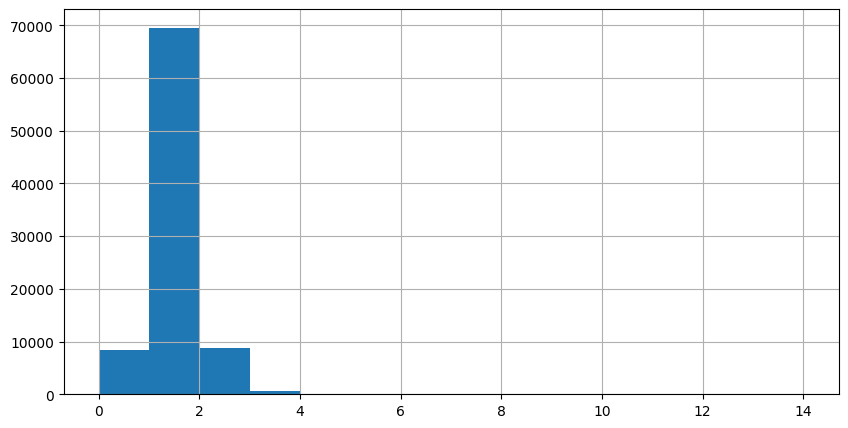

In [8]:
print(movies["Runtime"].describe())
movies["Runtime"].hist(bins=(14), figsize=(10, 5))

Top-10 movies in length (how are there movies that reach 14h of runtime)

In [9]:
movies.nlargest(10, ["Runtime"])[["MovieID", "Title", "Runtime"]]

,MovieID,Title,Runtime
50288,179467,The Reality of Me (2012),14.000000
67343,217137,Women Make Film: A New Road Movie Through Cine...,14.000000
76891,254803,Music with Roots in the Aether: Opera for Tele...,14.000000
60098,200286,The Flower (2019),13.466667
25426,123621,Space (1985),13.000000
54027,187263,Out 1 (1971),12.933333
59578,199129,The Blues (2003),12.833333
47882,174375,Hollywood (1980),11.266667
53539,186269,Mikhaylo Lomonosov (1986),11.050000
64717,210993,Evolution of a Filipino Family (2004),10.416667


#### Average Rating and Vote Count

array([[<Axes: title={'center': 'AverageRating'}>,
        <Axes: title={'center': 'VoteCount'}>]], dtype=object)

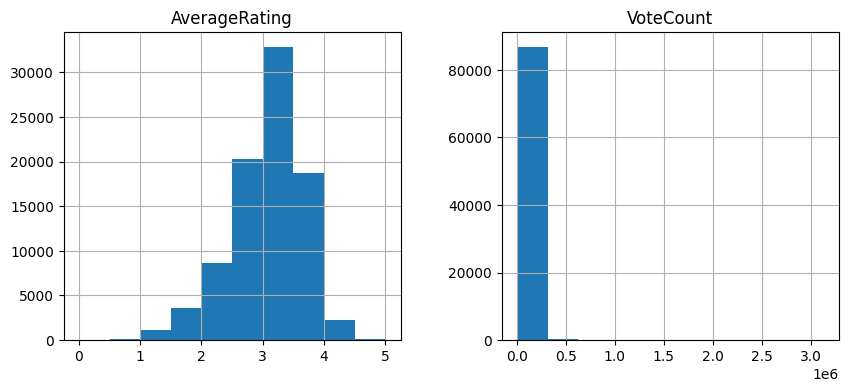

In [15]:
movies.hist(column=["AverageRating", "VoteCount"], figsize=(10, 4))

Top-5 movies in rating

In [16]:
movies.nlargest(5, ["AverageRating"])[["MovieID", "Title", "AverageRating", "VoteCount"]]

,MovieID,Title,AverageRating,VoteCount
49699,178157,BlueGreen,5.0,1.0
50809,180549,Le mystère de Fatima (2017),5.0,2.0
52291,183647,11 September Vragen (2016),5.0,2.0
56190,191973,Tamale Road: A Memoir from El Salvador (2012),5.0,1.0
67487,217531,Deconstructing the Beatles' Abbey Road: Side One,5.0,1.0


Top-5 movies in vote

In [17]:
movies.nlargest(5, ["VoteCount"])[["MovieID", "Title", "AverageRating", "VoteCount"]]

,MovieID,Title,AverageRating,VoteCount
314,318,"Shawshank Redemption, The (1994)",4.639923,3130026.0
12223,58559,"Dark Knight, The (2008)",4.491602,2992176.0
14939,79132,Inception (2010),4.393153,2694450.0
2867,2959,Fight Club (1999),4.393513,2506681.0
351,356,Forrest Gump (1994),4.384807,2427701.0


Weighted rating

$$\text{Weighted Rating} = \left( \frac{v}{v + c} \right).R +\left( \frac{c}{v + c} \right).\bar{R}$$
With:
- *R* : Movie's average rating 
- *v* : Movie's vote count
- *c* : 95th percentile of vote count


In [21]:
R_bar = movies["AverageRating"].mean()
c = movies["VoteCount"].quantile(0.95)
print(f"Mean: {R_bar}, 95th: {c}")
def weighted_rating(row):
    R = row["AverageRating"]
    v = row["VoteCount"]
    return Series(
        [row["MovieID"], row["Title"], (v * R + c * R_bar) / (v + c)],
        index=["MovieID", "Title", "Weighted Average"],
    )
weighted = movies.apply(weighted_rating, axis=1)
weighted.nlargest(10, ["Weighted Average"])

Mean: 3.0730214118573023, 95th: 49447.8


,MovieID,Title,Weighted Average
314,318,"Shawshank Redemption, The (1994)",4.615555
46103,170705,Band of Brothers (2001),4.564241
840,858,"Godfather, The (1972)",4.556130
12223,58559,"Dark Knight, The (2008)",4.468540
7029,7153,"Lord of the Rings: The Return of the King, The...",4.452290
1190,1221,"Godfather: Part II, The (1974)",4.445295
522,527,Schindler's List (1993),4.443695
76413,252710,Attack On Titan (2013),4.430216
1173,1203,12 Angry Men (1957),4.420834
292,296,Pulp Fiction (1994),4.411032


Normalized

In [19]:
weighted_max = weighted["Weighted Average"].max()
weighted_min = weighted["Weighted Average"].min()
weighted_range = weighted_max - weighted_min
def normalized_rating(row):
    r = row["Weighted Average"]
    r = (r - weighted_min) / weighted_range
    return Series(
        [row["MovieID"], row["Title"], r],
        index=["MovieID", "Title", "Normalized Average"],
    )
normalized = weighted.apply(normalized_rating, axis=1)
normalized.nlargest(10, ["Normalized Average"])

,MovieID,Title,Normalized Average
314,318,"Shawshank Redemption, The (1994)",1.000000
46103,170705,Band of Brothers (2001),0.984003
840,858,"Godfather, The (1972)",0.981475
12223,58559,"Dark Knight, The (2008)",0.954169
7029,7153,"Lord of the Rings: The Return of the King, The...",0.949104
1190,1221,"Godfather: Part II, The (1974)",0.946923
522,527,Schindler's List (1993),0.946424
76413,252710,Attack On Titan (2013),0.942222
1173,1203,12 Angry Men (1957),0.939298
292,296,Pulp Fiction (1994),0.936242


#### Genres

In [168]:
movies_genres = (movies[["MovieID", "Genres"]]
 .explode(column="Genres")
 .groupby("Genres")
 .count().drop("(no genres listed)")
 .sort_values(by="MovieID", ascending=True))

array([<Axes: ylabel='MovieID'>], dtype=object)

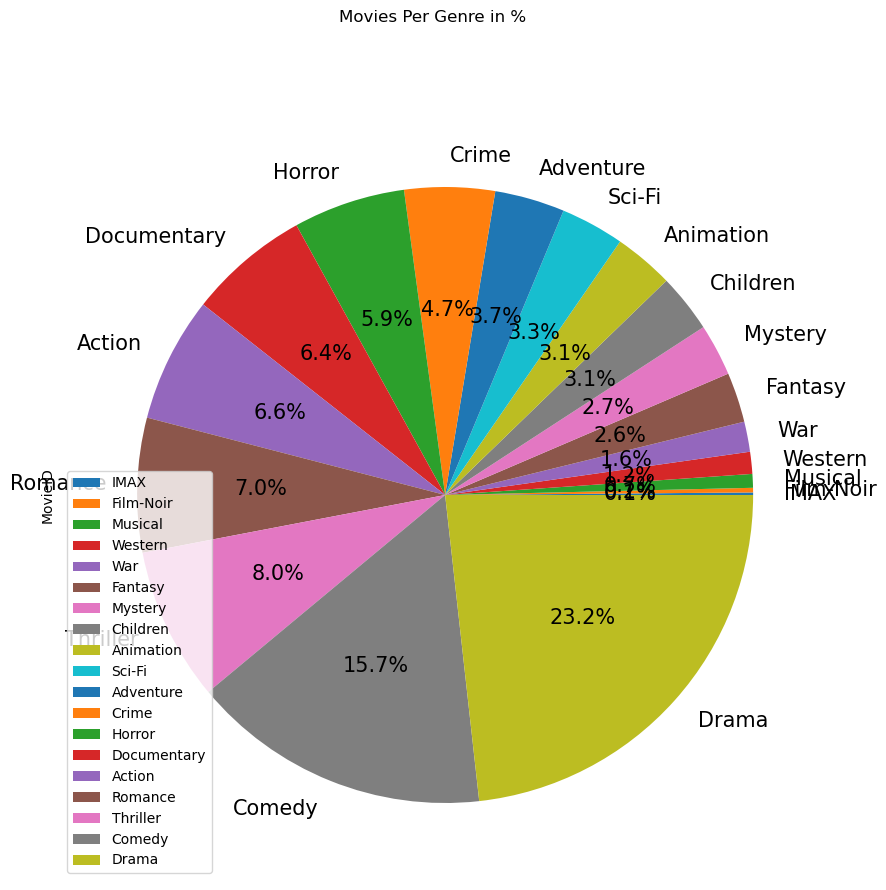

In [169]:
movies_genres.plot.pie(
    title="Movies Per Genre in %",
    figsize=(10, 10),
    autopct="%1.1f%%",
    fontsize=15,
    subplots=True,
)

<Axes: title={'center': 'Movies per Genre'}, ylabel='Genres'>

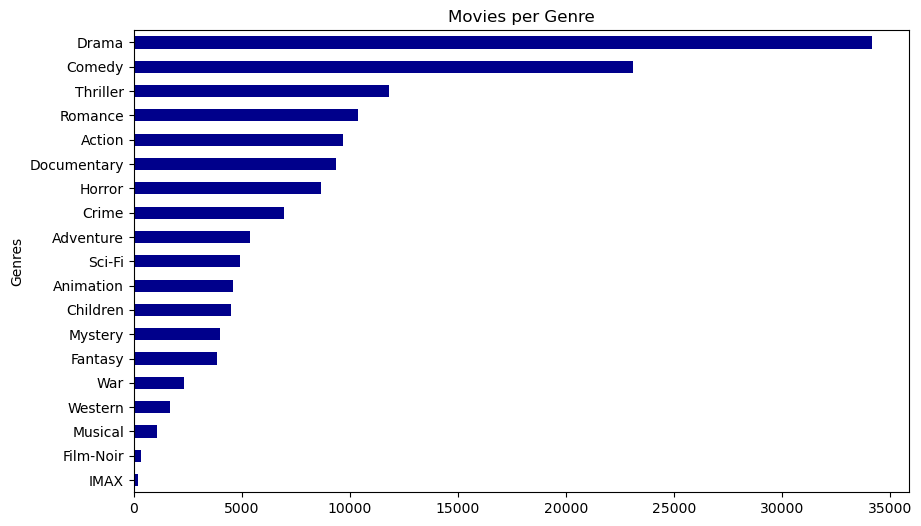

In [170]:
movies_genres["MovieID"].plot.barh(
    title="Movies per Genre", color="DarkBlue", figsize=(10, 6)
)

#### Directors

In [177]:
movie_directors = (movies[["MovieID", "Directors"]]
.explode(column="Directors")
.groupby("Directors")
.count()
.sort_values(by="MovieID", ascending=False)
)

In [178]:
movie_directors.head(10)

,MovieID
Directors,
Georges Méliès,118
Friz Freleng,111
Chuck Jones,110
Tex Avery,90
Michael Curtiz,85
Jean-Luc Godard,75
John Ford,73
Richard Thorpe,68
Jack Hannah,65


In [179]:
movie_directors.tail(10)

,MovieID
Directors,
Leon Bashir,1
Leo Zhang,1
David A. Armstrong,1
Leo Scott,1
Leo Scherman,1
Leo Salkin,1
David A. Oster,1
Leo Milano,1
Leo Medel,1


#### Cast

In [180]:
movie_cast = (movies[["MovieID", "Cast"]]
.explode(column="Cast")
.groupby("Cast")
.count()
.sort_values(by="MovieID", ascending=False)
)

In [181]:
movie_cast.head(10)

,MovieID
Cast,
Bess Flowers,506
Mel Blanc,310
Frank Welker,254
Sam Harris,250
William H. O'Brien,218
Harold Miller,215
Eric Roberts,213
Christopher Lee,209
Irving Bacon,206


In [182]:
movie_cast.tail(10)

,MovieID
Cast,
Jaime Ruiz Peñas,1
Jaime Roman,1
Jaime Rogers,1
Jaime Rodríguez,1
Jaime Robinson,1
Jaime Robertson,1
Jaime Rivas,1
Jaime Reichner,1
Jaime Ray Soto,1


### B. On Rating Dataset

In [3]:
def print_data_count(ratings: pd.DataFrame):
    s = ["user", "movie"]
    p = ["rated from", "are rated by"]
    for i, t in enumerate(["UserID", "MovieID"]):
        group = ratings[[t, "Rating"]].groupby([t])
        movie_count = group.count().values
        print(f"There are {len(group)} {s[i]}s in the dataset")
        print(f"Each {s[i]} {p[i]} {movie_count.min()}-{movie_count.max()} {s[1-i]}s.")

In [4]:
print_data_count(ratings)

There are 200948 users in the dataset
Each user rated from 20-33332 movies.
There are 84432 movies in the dataset
Each movie are rated by 1-102929 users.


array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

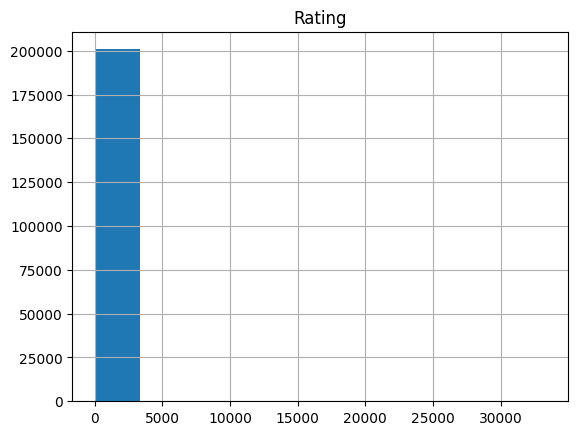

In [37]:
group_rating = ratings[["UserID", "Rating"]].groupby(["UserID"])
group_rating.count().hist()